# Introduction




# Prepare for analysis

## Load packages

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from titanic import data, plot_utils, modelling, eval

## Hard-coded parameters

In [2]:
TRAIN_PATH = "data/train.csv"
TEST_PATH = "data/test.csv"

## Read the data

In [3]:
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

# Preliminary data inspection

## Quick glimpse of the data
TODO: Think if you can abstract away much here.

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Few statistics on the data

### Missing data

In [10]:
df_missing_train = data.missing_data_table_analysis(train_df)
df_missing_train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,0,0,0,0,0,177,0,0,0,0,687,2
Percent,0.0,0.0,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,0.0,77.104377,0.224467
Types,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object


In [11]:
df_missing_test = data.missing_data_table_analysis(test_df)
df_missing_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,0,0,0,0,86,0,0,0,1,327,0
Percent,0.0,0.0,0.0,0.0,20.574163,0.0,0.0,0.0,0.239234,78.229665,0.0
Types,int64,int64,object,object,float64,int64,int64,object,float64,object,object


### Most frequent data

In [12]:
data.most_freq_table(train_df)


,Total,Most frequent item,Frequence,Percent from total
PassengerId,891,1,1,0.112
Survived,891,0,549,61.616
Pclass,891,3,491,55.107
Name,891,"Braund, Mr. Owen Harris",1,0.112
Sex,891,male,577,64.759
Age,714,24.0,30,4.202
SibSp,891,0,608,68.238
Parch,891,0,678,76.094
Ticket,891,347082,7,0.786
Fare,891,8.05,43,4.826


In [13]:
data.most_freq_table(test_df)

,Total,Most frequent item,Frequence,Percent from total
PassengerId,418,892,1,0.239
Pclass,418,3,218,52.153
Name,418,"Kelly, Mr. James",1,0.239
Sex,418,male,266,63.636
Age,332,21.0,17,5.120
SibSp,418,0,283,67.703
Parch,418,0,324,77.512
Ticket,418,PC 17608,5,1.196
Fare,417,7.75,21,5.036
Cabin,91,B57 B59 B63 B66,3,3.297


### Unique values

In [14]:
data.unique_values_table(train_df)


,Total,Uniques
PassengerId,891,891
Survived,891,2
Pclass,891,3
Name,891,891
Sex,891,2
Age,714,88
SibSp,891,7
Parch,891,7
Ticket,891,681
Fare,891,248


In [15]:
data.unique_values_table(test_df)


,Total,Uniques
PassengerId,418,418
Pclass,418,3
Name,418,418
Sex,418,2
Age,332,79
SibSp,418,7
Parch,418,8
Ticket,418,363
Fare,417,169
Cabin,91,76


# Exploratory data analysis

## Univariate analysis for all features


We show here two graphs in paralel:
* distribution of class values, split per Survived value
* comparison of class values, in train and test data


Let's first aggregate train and test data into one single dataframe, `all_df`.

In [16]:
all_df = data.concatenator(train_df,test_df)


In [17]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,set
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


c:\Users\ns751\projects\ds100\ps1_test\test_titanic_problem_set\titanic\plot_utils.py:12: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=COLOR_LIST)


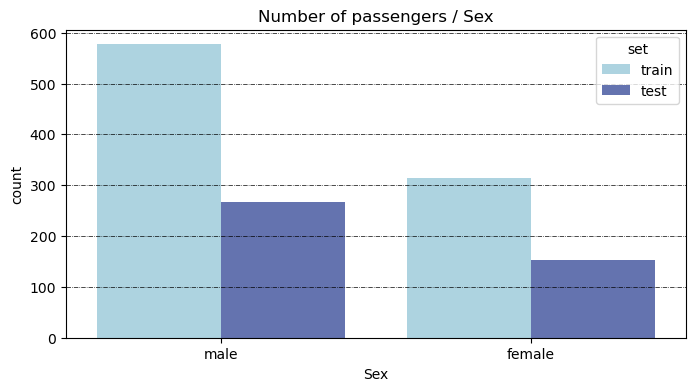

In [18]:
# Plot count pairs "Sex"
plot_utils.plot_count_pairs(data_df=all_df,feature="Sex", title="Sex", hue="set") 

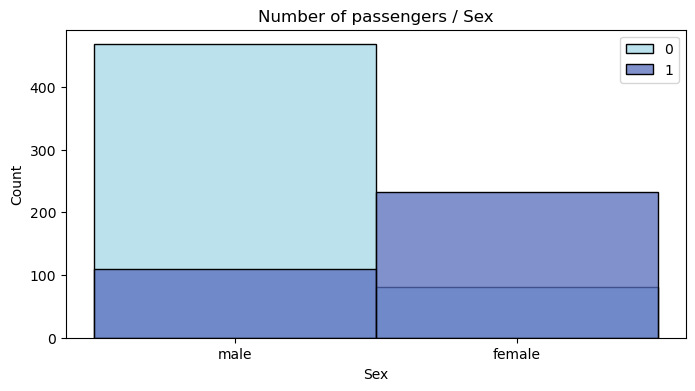

In [19]:
# Plot distribution pairs for "Sex" and hue as "Survived"
plot_utils.plot_distribution_pairs(data_df=train_df, feature="Sex", title="Sex", hue="Survived")

c:\Users\ns751\projects\ds100\ps1_test\test_titanic_problem_set\titanic\plot_utils.py:12: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=COLOR_LIST)


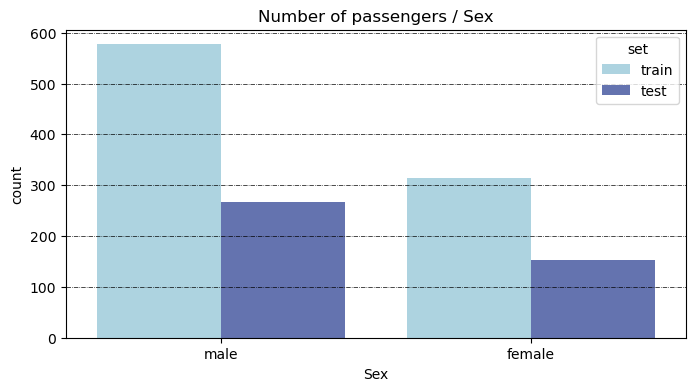

c:\Users\ns751\projects\ds100\ps1_test\test_titanic_problem_set\titanic\plot_utils.py:12: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=COLOR_LIST)


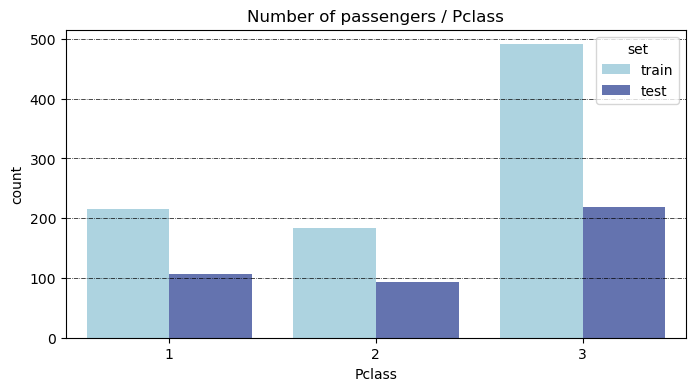

c:\Users\ns751\projects\ds100\ps1_test\test_titanic_problem_set\titanic\plot_utils.py:12: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=COLOR_LIST)


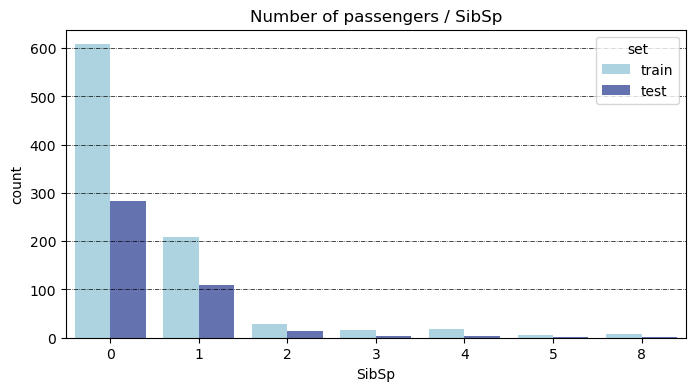

c:\Users\ns751\projects\ds100\ps1_test\test_titanic_problem_set\titanic\plot_utils.py:12: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=COLOR_LIST)


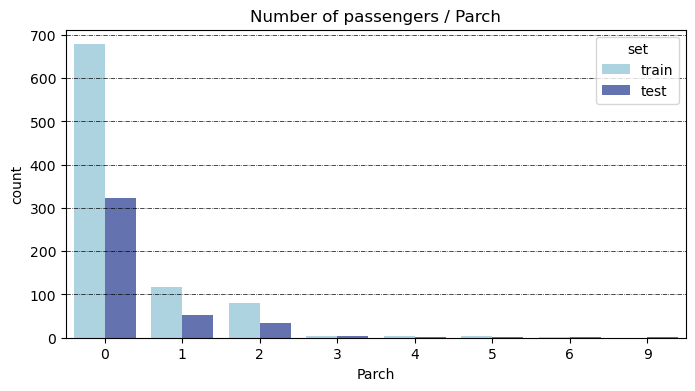

In [20]:
# Plot count pairs using all_df for the columns: Sex, Pclasss, SibSp, Parch, Embarked
features = ["Sex", "Pclass", "SibSp", "Parch"]
for feat in features:
    plot_utils.plot_count_pairs(data_df=all_df,feature=feat, title=feat, hue="set")

c:\Users\ns751\projects\ds100\ps1_test\test_titanic_problem_set\titanic\plot_utils.py:12: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=COLOR_LIST)


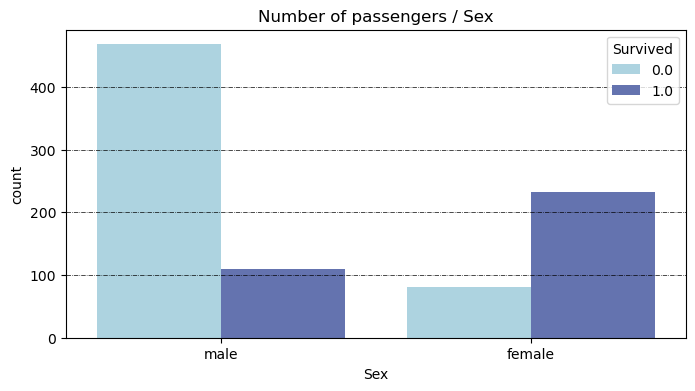

c:\Users\ns751\projects\ds100\ps1_test\test_titanic_problem_set\titanic\plot_utils.py:12: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=COLOR_LIST)


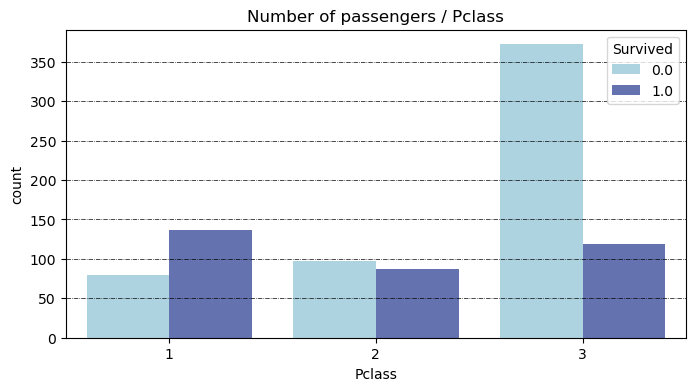

c:\Users\ns751\projects\ds100\ps1_test\test_titanic_problem_set\titanic\plot_utils.py:12: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=COLOR_LIST)


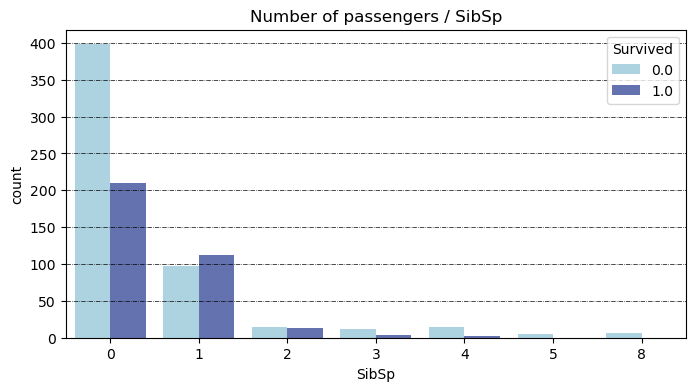

c:\Users\ns751\projects\ds100\ps1_test\test_titanic_problem_set\titanic\plot_utils.py:12: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=COLOR_LIST)


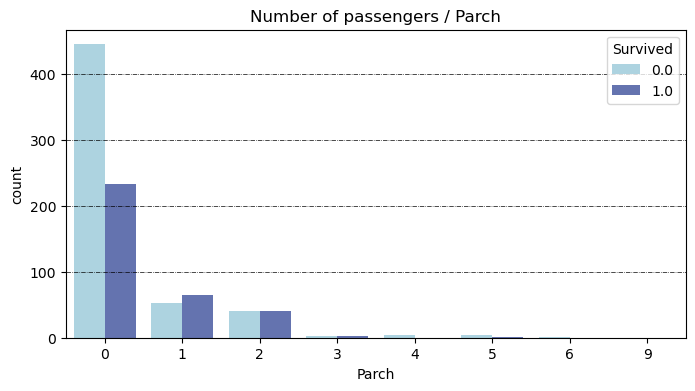

In [21]:
# Plot count pairs using all_df for the columns: Sex, Pclasss, SibSp, Parch, Embarked and use "Survived" as hue.
for feat in features:
    plot_utils.plot_count_pairs(data_df=all_df,feature=feat, title=feat, hue="Survived")

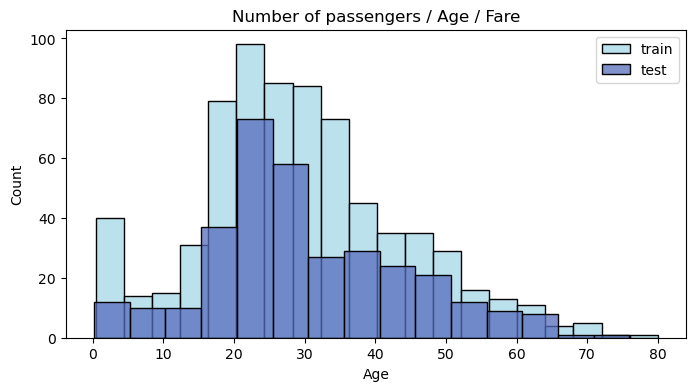

In [22]:
# Plot distribution pairs for Age and Fare
plot_utils.plot_distribution_pairs(data_df=all_df, feature="Age", title="Age / Fare")

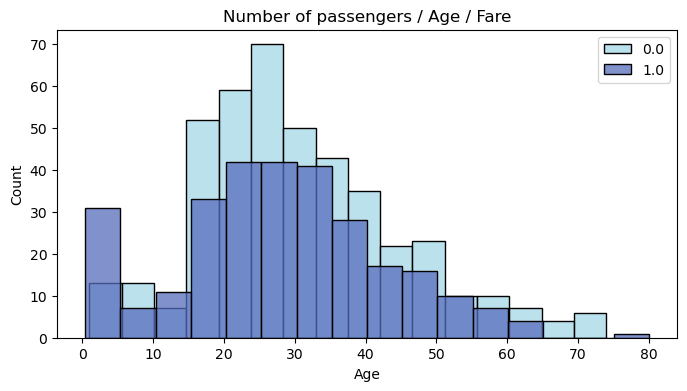

In [23]:
# Plot distribution pairs for Age and Fare using "Survived" as hue
plot_utils.plot_distribution_pairs(data_df=all_df, feature="Age", title="Age / Fare", hue="Survived")

## Family size


Based on SibSp (sibilings or spouse) and Parch (parents or children), we set the Family Size field.

In [38]:
all_df = data.family_size(all_df)

In [39]:
train_df = data.family_size(train_df)

In [ ]:
# Plot count pairs using all_df for the column "Family Size" and use "Survived" as hue.
plot_utils.plot_count_pairs(data_df=all_df,feature="Family Size", title="Family Size (grouped by survival)", hue="Survived")

## Age interval

In [42]:
all_df = data.age_interval(all_df, age_col="Age")


In [43]:
all_df = data.age_interval(train_df, age_col="Age")

In [ ]:
all_df.head()

ValueError: Could not interpret value `Age Interval` for `x`. An entry with this name does not appear in `data`.

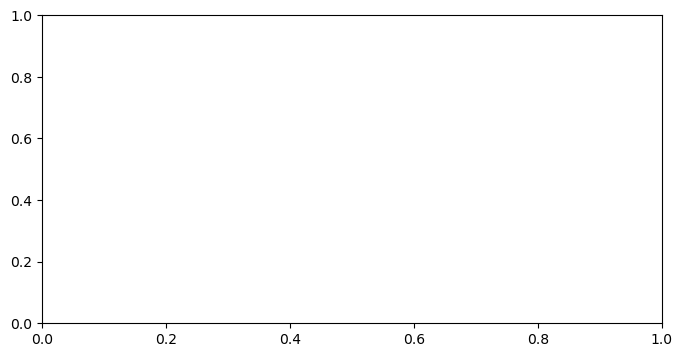

In [24]:
# Plot count pairs using all_df for the column "Age Interval" and use "Survived" as hue.
plot_utils.plot_count_pairs(data_df=all_df,feature="Age Interval", title="Age Interval (grouped by survival)", hue="Survived")

## Fare interval

In [47]:
# TODO: turn into function
all_df['Fare Interval'] = 0.0
all_df.loc[ all_df['Fare'] <= 7.91, 'Fare Interval'] = 0
all_df.loc[(all_df['Fare'] > 7.91) & (all_df['Fare'] <= 14.454), 'Fare Interval'] = 1
all_df.loc[(all_df['Fare'] > 14.454) & (all_df['Fare'] <= 31), 'Fare Interval']   = 2
all_df.loc[ all_df['Fare'] > 31, 'Fare Interval'] = 3

In [48]:
# TODO: turn into function
train_df['Fare Interval'] = 0.0
train_df.loc[ train_df['Fare'] <= 7.91, 'Fare Interval'] = 0
train_df.loc[(train_df['Fare'] > 7.91) & (train_df['Fare'] <= 14.454), 'Fare Interval'] = 1
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 31), 'Fare Interval']   = 2
train_df.loc[ train_df['Fare'] > 31, 'Fare Interval'] = 3

In [ ]:
# Plot count pairs using all_df for the column "Fare Interval"

Let's create a composed feature: Pclass + Sex.

In [50]:
# TODO: turn into function
train_df["Sex_Pclass"] = train_df.apply(lambda row: row['Sex'][0].upper() + "_C" + str(row["Pclass"]), axis=1)

In [51]:
# TODO: turn into function
all_df["Sex_Pclass"] = all_df.apply(lambda row: row['Sex'][0].upper() + "_C" + str(row["Pclass"]), axis=1)

In [ ]:
# Plot count pairs using all_df for the column "Fare Interval" and "Fare (grouped by survival)" with "Survived" as hue

## Process names


When we process names, we would like to extract the following information:

- Family name - this is the first word (or few first words, if a family name with multiple names), followed by a comma  
- Title - this follows just after the comma   
- Given name - this is the word or group of words following family name  
- Maiden name - for ladies, is given between parantheses  

We start with creating a function that parses the Name string and extract (if possible) these 4 elements


In [58]:
# TODO: also move this function to a separate file
def parse_names(row):
    try:
        text = row["Name"]
        split_text = text.split(",")
        family_name = split_text[0]
        next_text = split_text[1]
        split_text = next_text.split(".")
        title = (split_text[0] + ".").lstrip().rstrip()
        next_text = split_text[1]
        if "(" in next_text:
            split_text = next_text.split("(")
            given_name = split_text[0]
            maiden_name = split_text[1].rstrip(")")
            return pd.Series([family_name, title, given_name, maiden_name])
        else:
            given_name = next_text
            return pd.Series([family_name, title, given_name, None])
    except Exception as ex:
        print(f"Exception: {ex}")
    
    

In [59]:
# TODO: turn into function
all_df[["Family Name", "Title", "Given Name", "Maiden Name"]] = all_df.apply(lambda row: parse_names(row), axis=1)

In [60]:
# TODO: turn into function
train_df[["Family Name", "Title", "Given Name", "Maiden Name"]] = train_df.apply(lambda row: parse_names(row), axis=1)

## Multivariate analysis


Let's look now to the interaction of multiple features.

In [ ]:
# TODO: Plot count pairs of "Age Interval" grouped by "Pclass"

In [ ]:
# TODO: Plot count pairs of "Age Interval" grouped by "Embarked"

In [ ]:
# TODO: Plot count pairs of "Pclass" grouped by "Fare Interval"

### Few more engineered data 


Let's create two more engineered features:  
* Family size interval: Single, Small, Large  
* Aggregated titles: Mr, Mrs, Master, Miss, and Rare  

In [91]:
# TODO: turn into function
for dataset in [all_df, train_df]:
    dataset["Family Type"] = dataset["Family Size"]

In [92]:
# TODO: turn into function
for dataset in [all_df, train_df]:
    dataset.loc[dataset["Family Size"] == 1, "Family Type"] = "Single"
    dataset.loc[(dataset["Family Size"] > 1) & (dataset["Family Size"] < 5), "Family Type"] = "Small"
    dataset.loc[(dataset["Family Size"] >= 5), "Family Type"] = "Large"

In [93]:
for dataset in [all_df, train_df]:
    dataset["Titles"] = dataset["Title"]

In [94]:
# TODO: turn into function
for dataset in [all_df, train_df]:
    #unify `Miss`
    dataset['Titles'] = dataset['Titles'].replace('Mlle.', 'Miss.')
    dataset['Titles'] = dataset['Titles'].replace('Ms.', 'Miss.')
    #unify `Mrs`
    dataset['Titles'] = dataset['Titles'].replace('Mme.', 'Mrs.')
    # unify Rare
    dataset['Titles'] = dataset['Titles'].replace(['Lady.', 'the Countess.','Capt.', 'Col.',\
     'Don.', 'Dr.', 'Major.', 'Rev.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Rare')

In [ ]:
# TODO: turn into function
train_df[['Titles', 'Sex', 'Survived']].groupby(['Titles', 'Sex'], as_index=False).mean()

# Baseline model

## Feature engineering: Map categorical value to numerical values

In [98]:
# TODO: turn into function
for dataset in [train_df, test_df]:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

Create train-validation split.

In [99]:
VALID_SIZE = 0.2
train, valid = train_test_split(train_df, test_size=VALID_SIZE, random_state=42, shuffle=True)

Define predictor features and target feature.

In [100]:
predictors = ["Sex", "Pclass"]
target = 'Survived'

Define the training and validation data and labels.

In [101]:
# TODO: turn into function
train_X = train[predictors]
train_Y = train[target].values
valid_X = valid[predictors]
valid_Y = valid[target].values

Initialize the classifiction algorithm.

In [102]:
# TODO: could this and the following code cells be turned into a function that returns the prediction?
clf = RandomForestClassifier(n_jobs=-1, 
                             random_state=42,
                             criterion="gini",
                             n_estimators=100,
                             verbose=False)

Fit the classifier with the training data.

In [ ]:
clf.fit(train_X, train_Y)

Predict the train data (to check the training classification error).

In [104]:
preds_tr = clf.predict(train_X)

Predict the validation data.

In [105]:
preds = clf.predict(valid_X)

# Evaluation

## Classification report for training data.

In [ ]:
print(metrics.classification_report(train_Y, preds_tr, target_names=['Not Survived', 'Survived']))

Classification report for validation data.

In [ ]:
print(metrics.classification_report(valid_Y, preds, target_names=['Not Survived', 'Survived']))